In [1]:
# Importing the modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import pickle
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV, ElasticNet, ElasticNetCV
import seaborn as sns
import scipy.stats as stats
import sklearn
%matplotlib inline

C:\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.QVLO2T66WEPI7JZ63PS3HMOHFEY472BC.gfortran-win_amd64.dll
C:\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)

Bad key "text.kerning_factor" on line 4 in
C:\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
# importing the datasaet
from sklearn.datasets import load_boston
boston = load_boston()
bos = pd.DataFrame(boston.data)

In [3]:
# print first 5 rows
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
# Checking the dimensions of the data
bos.shape

(506, 13)

In [5]:
# Checking the data type for each column
bos.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11    float64
12    float64
dtype: object

In [6]:
# Checking for duplicates in data
bos.duplicated().sum()

0

In [7]:
# checking the null count and data types
bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       506 non-null    float64
 1   1       506 non-null    float64
 2   2       506 non-null    float64
 3   3       506 non-null    float64
 4   4       506 non-null    float64
 5   5       506 non-null    float64
 6   6       506 non-null    float64
 7   7       506 non-null    float64
 8   8       506 non-null    float64
 9   9       506 non-null    float64
 10  10      506 non-null    float64
 11  11      506 non-null    float64
 12  12      506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [8]:
# Checking the statistical summary like mean, count, etc.
bos.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


**Observation**: We can see that there are no missing values in the dataset

### Exploratory Data Analysis

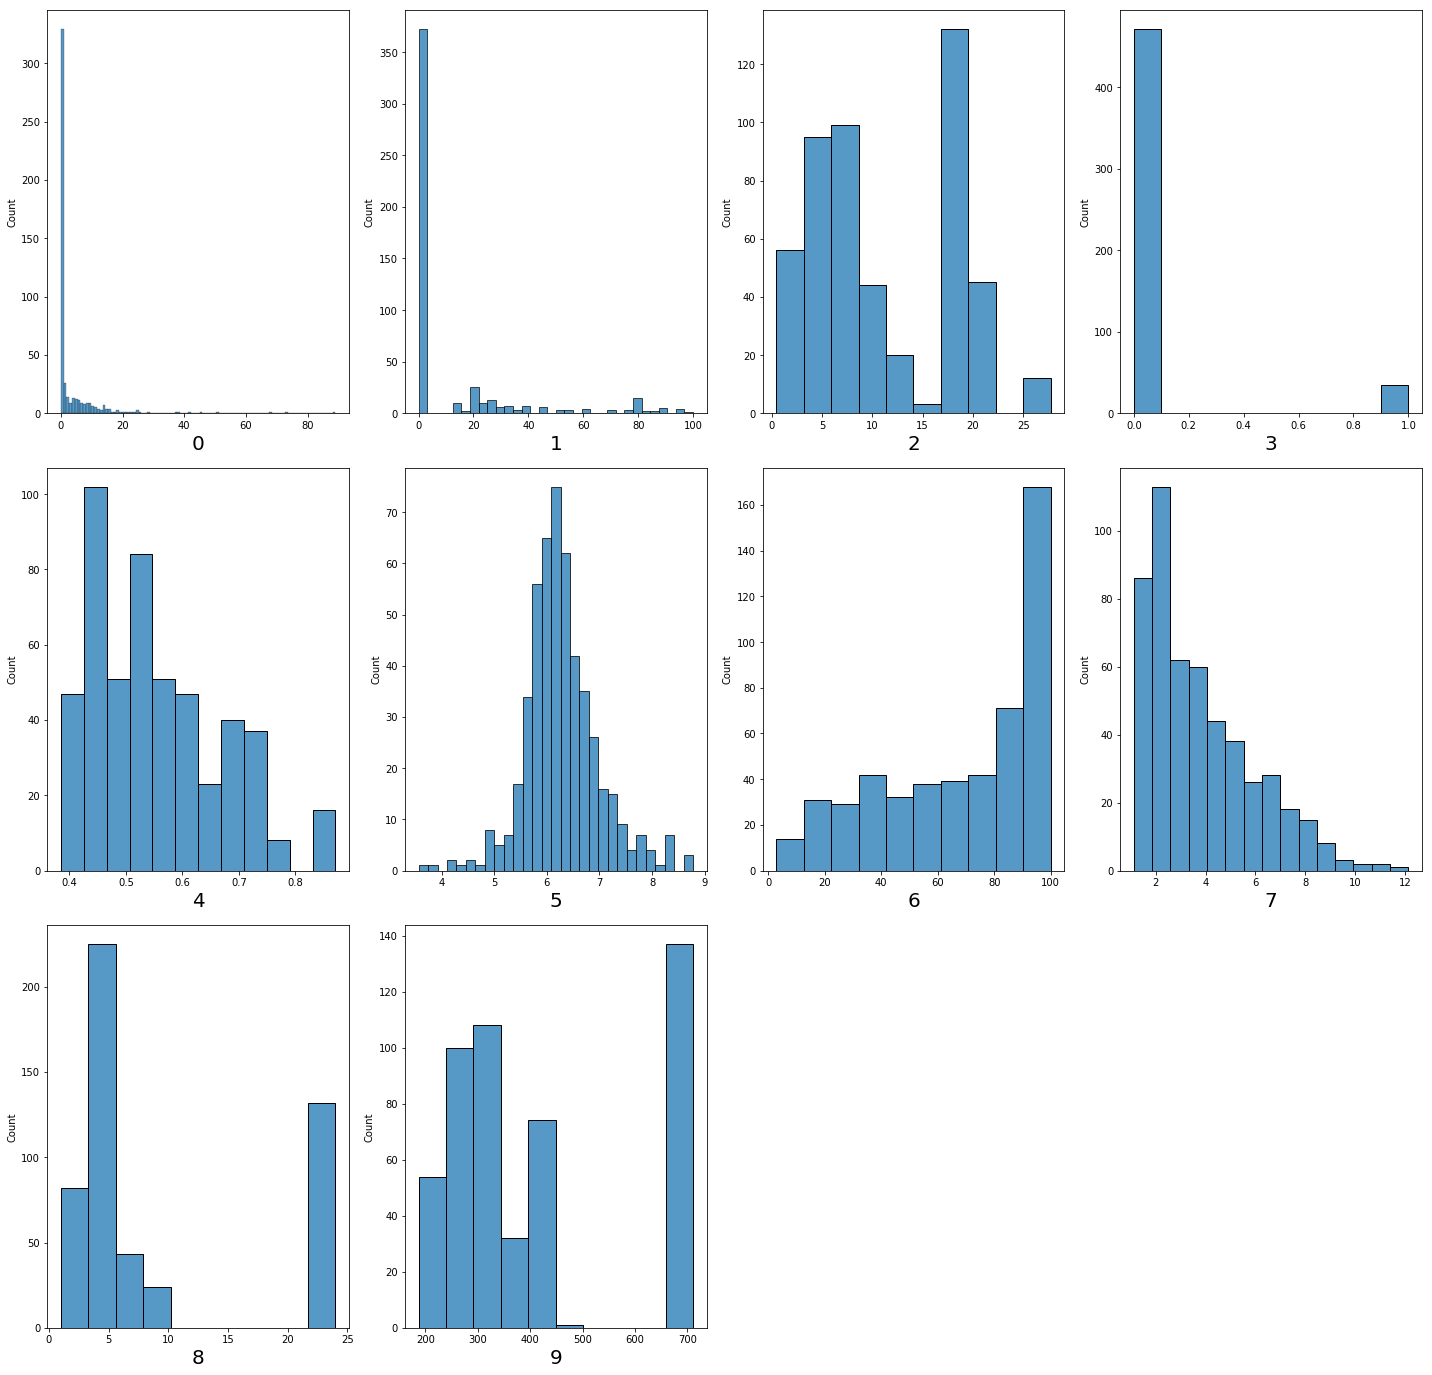

In [9]:
# Lets check the distribution of data
plt.figure(figsize=(20,25), facecolor="white")
plotnumber = 1
for column in bos:
    if plotnumber <= 10:
        ax = plt.subplot(4,4,plotnumber)
        sns.histplot(bos[column])
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.tight_layout()       
    

**Observation**: We can find some skewness in data. Lets check if there are outliers in the data

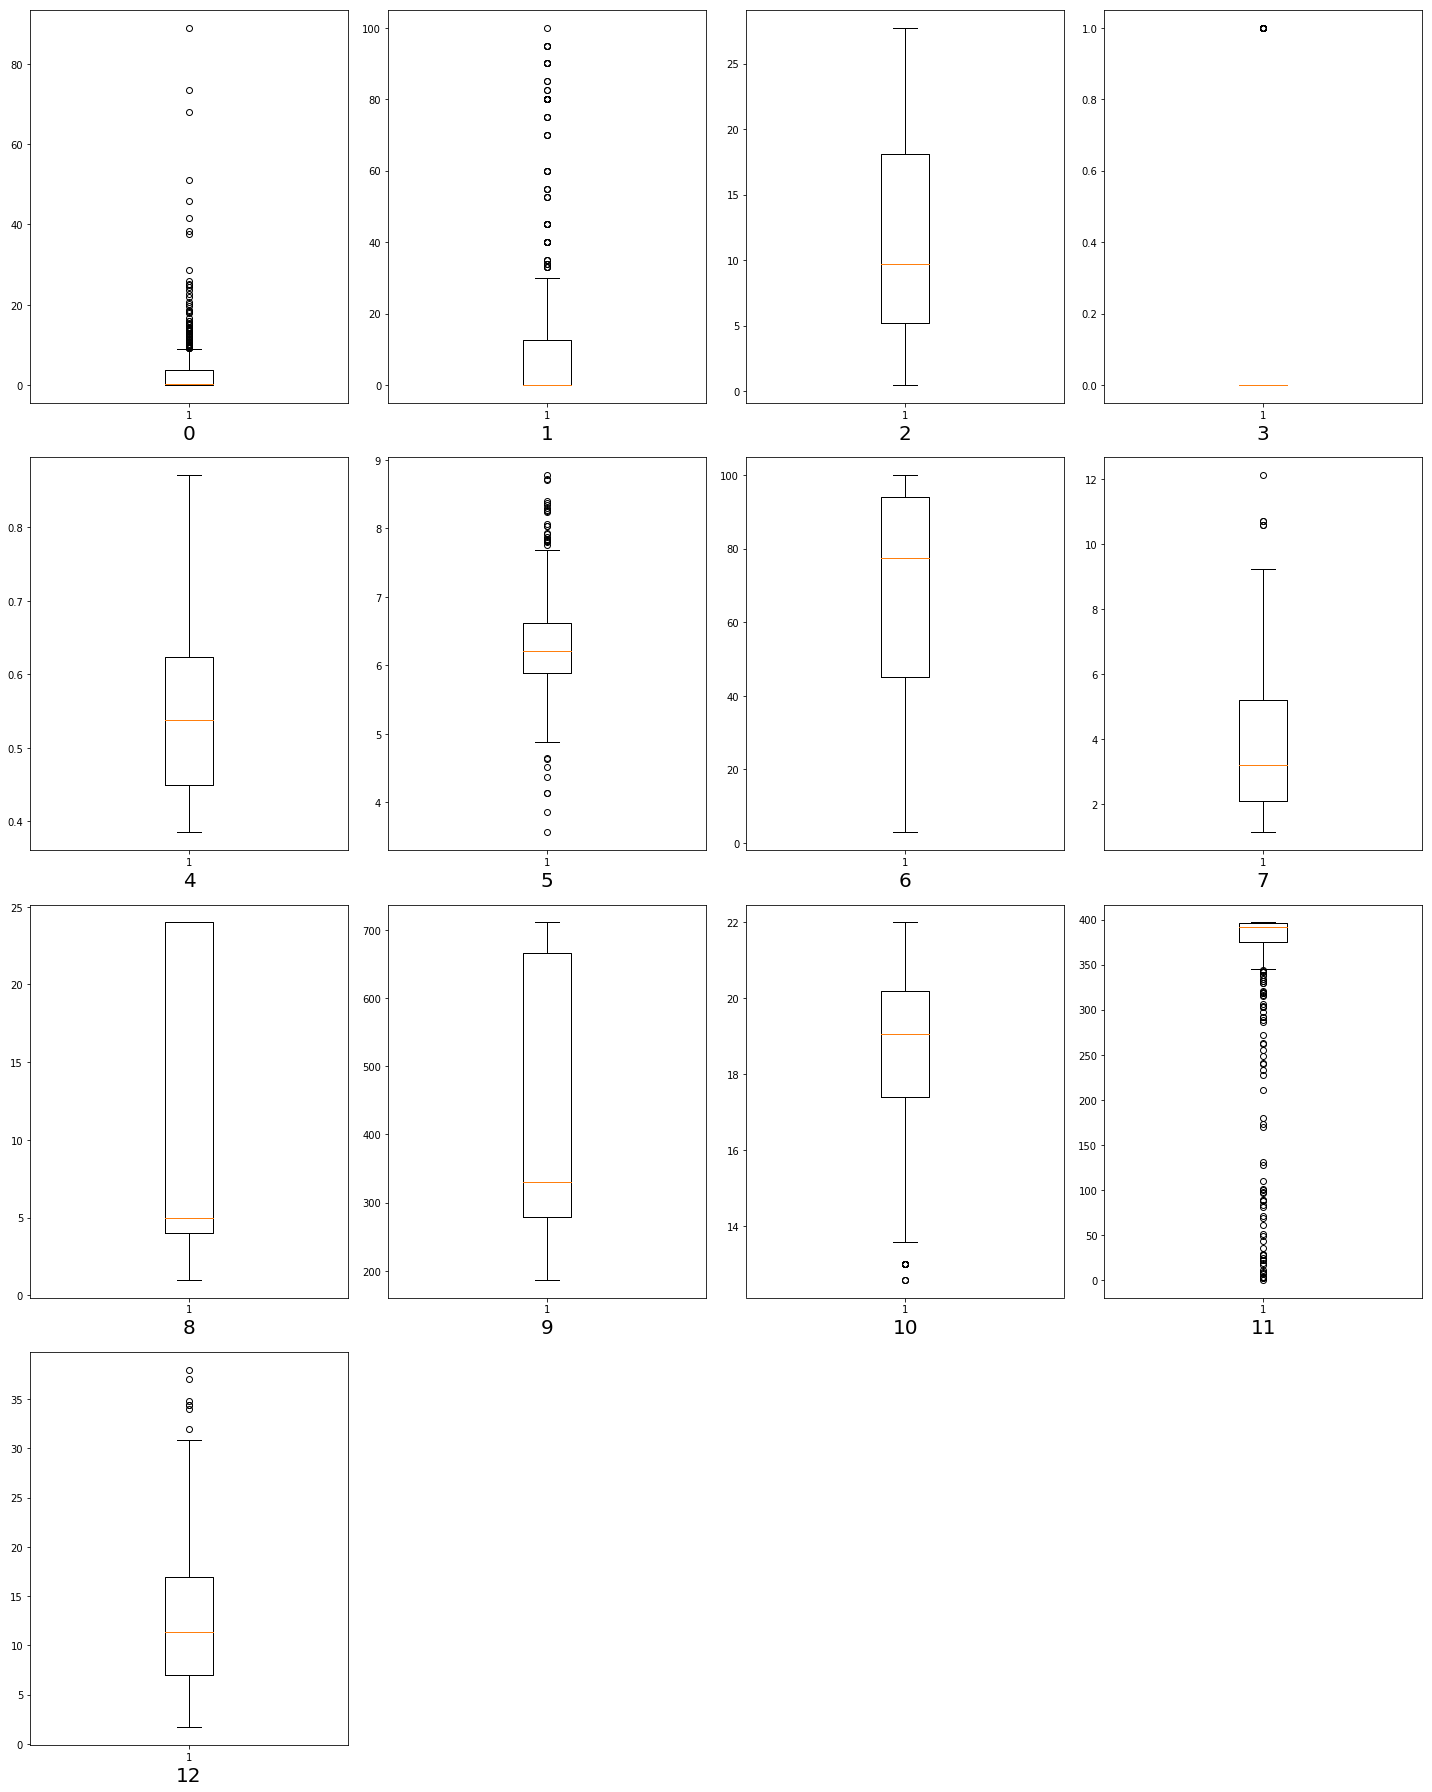

In [49]:
# checking the outliers
plt.figure(figsize=(20,25), facecolor="white")
plotnumber = 1
for column in bos:
    if plotnumber <= 16:
        ax = plt.subplot(4,4,plotnumber)
        plt.boxplot(bos[column])
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [11]:
bos[3].value_counts()

0.0    471
1.0     35
Name: 3, dtype: int64

**Observation**:

 - There seems to be some extreme points in features 0, 1, 5,7, 10, and 11
 - Feature 3 is having binary values of 0 and 1

In [12]:
Q1 = bos.quantile(0.25)
Q3 = bos.quantile(0.75)
IQR = Q3 - Q1
IQR

0       3.595038
1      12.500000
2      12.910000
3       0.000000
4       0.175000
5       0.738000
6      49.050000
7       3.088250
8      20.000000
9     387.000000
10      2.800000
11     20.847500
12     10.005000
dtype: float64

In [13]:
# Let check the correlation matrix. Correlation matrix shows the correlation among features and ranges from -1 to 1
bos.corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
1,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
2,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
3,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
4,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
5,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
6,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
7,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
8,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
9,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


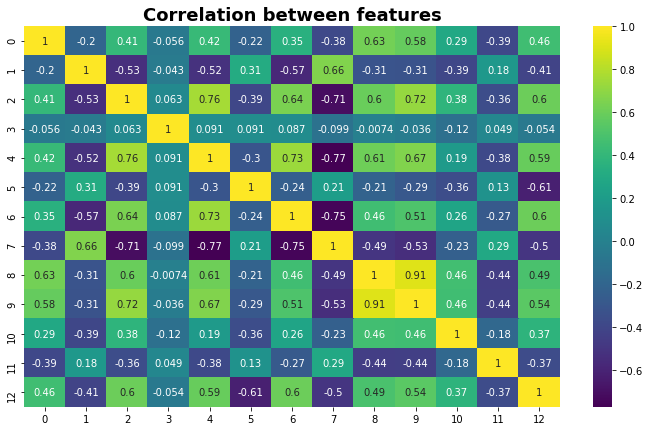

In [16]:
# heatmap
hm_corr = bos.corr()
fig, ax = plt.subplots(figsize=(12,7))
sns.heatmap(hm_corr, cmap='viridis', annot=True)
plt.title("Correlation between features", weight='bold', fontsize=18)
plt.show()

**Observation**:
 - There is high positive correlation between features 8 and 9 and suggests multicolinearity issue.

In [20]:
X = bos.drop(12, axis=1)
y = bos[12]

In [21]:
print(X.head())

        0     1     2    3      4      5     6       7    8      9     10  \
0  0.00632  18.0  2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1  0.02731   0.0  7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2  0.02729   0.0  7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3  0.03237   0.0  2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4  0.06905   0.0  2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   

       11  
0  396.90  
1  396.90  
2  392.83  
3  394.63  
4  396.90  


In [23]:
print(y.head())

0    4.98
1    9.14
2    4.03
3    2.94
4    5.33
Name: 12, dtype: float64


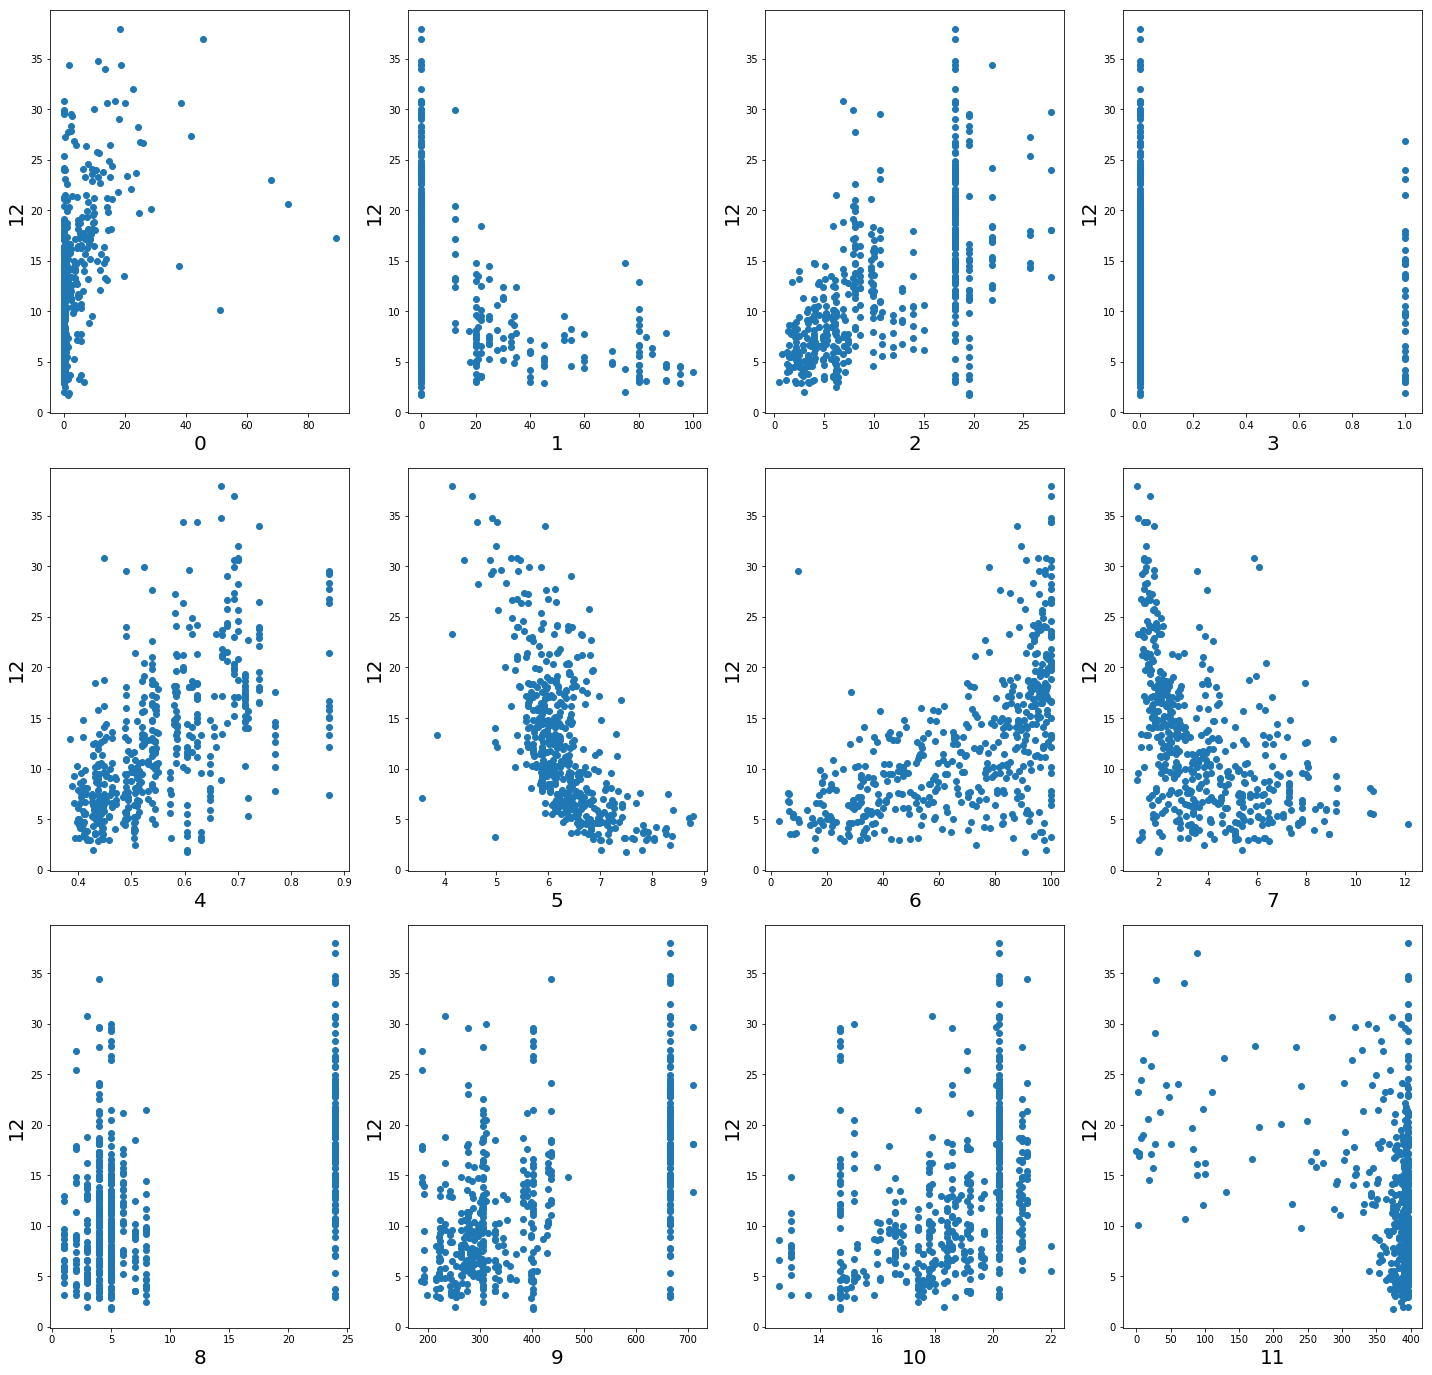

In [48]:
# Lets check relationship between independent and dependent variables

# Lets check the distribution of data
plt.figure(figsize=(20,25), facecolor="white")
plotnumber = 1
for column in X:
    if plotnumber <= 16:
        ax = plt.subplot(4,4,plotnumber)
        plt.scatter(X[column], y)
        plt.xlabel(column, fontsize=20)
        plt.ylabel(12, fontsize=20)
    plotnumber+=1
plt.tight_layout()  

**Observation**: There is no clear linear relationship between features 0,1,5,7,11 with the dependent feature 12

In [35]:
scaler = StandardScaler()
bos_scaled = scaler.fit_transform(X)

In [51]:
# Check multicolinearity with VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = bos_scaled
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables,i) for i in range(variables.shape[1])]
vif["Features"] = X.columns
vif

,VIF,Features
0,1.750401,0
1,2.292269,1
2,3.968425,2
3,1.070202,3
4,4.372942,4
5,1.380407,5
6,2.740023,6
7,3.950097,7
8,7.474983,8
9,9.006439,9


**Observation**:
 - There is high VIF (>5) between features 8 and 9 and suggests multicolinearity issue.

#### Train and Test Split

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bos_scaled, y, test_size=0.25, random_state=355)

In [39]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(379, 12)
(127, 12)
(379,)
(127,)


### Linear Regression

In [43]:
lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.coef_)
print(lr.intercept_)


[ 1.28571363  0.2259564   0.5815003  -0.26633036  0.2789256  -3.2188919
  2.33305302  0.07511654 -0.05950665  0.19134915  0.19619801 -0.96723934]
12.654247416517975


In [44]:
lr.score(X_train, y_train)

0.6907215996033398

In [50]:
lr.score(X_test, y_test)

0.5433227816551132

In [74]:
# Linear regression after removing feature 9 as there is multicolinearity between feature 8 and 9

In [79]:
X = bos.drop(columns=([12,9]), axis=1)
y = bos[12]
scaler = StandardScaler()
bos_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(bos_scaled, y, test_size=0.25, random_state=355)
lr = LinearRegression()
lr.fit(X_train, y_train)


print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))


0.6906452840451602
0.5445279843094046


### Linear Regression with Elastic Net

In [53]:
elasticCV = ElasticNetCV(alphas=None, cv=10, normalize=True)
elasticCV.fit(X_train, y_train)

ElasticNetCV(cv=10, normalize=True)

In [54]:
elasticCV.alpha_

0.0008177725070759506

In [56]:
elasticnet_reg = ElasticNet(alpha=elasticCV.alpha_, l1_ratio=0.5)
elasticnet_reg.fit(X_train, y_train)

ElasticNet(alpha=0.0008177725070759506)

In [58]:
elasticnet_reg.score(X_test, y_test)

0.5434402617867375

**Observations**:
 - We can see that even after removing the multicolinear feature we are getting same r-squared value of 54% on test data
 - Also, even after using ElasticNet Regularlization we are getting r-squared value of 54%. So it is fair to say that our regression model has been well trained over the training data and there is no overfitting.